Importation des librairies nécessaires


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Chargement des données

In [2]:
file_path = 'chienloup.csv'
data = pd.read_csv(file_path, sep=';')
print("Aperçu des données chargées:")
print(data.head())

Aperçu des données chargées:
      tu as oSPE  LCB    LSM     LBM  LP    LM    LAM  GENRE
0     BULL-DOG 1   1290    640   950   175   112  138  CHIEN
1     BULL-DOG 2   1540    740   760   200   142  165  CHIEN
2          BOXER   1580    710   710   167   125  133  CHIEN
3  SAINT-BERNARD   2200   1110   880   225   154  180  CHIEN
4    BULL-MASSIF   1900    930   780   197   132  140  CHIEN


création d'histogrammes pour chaque varibles numériques

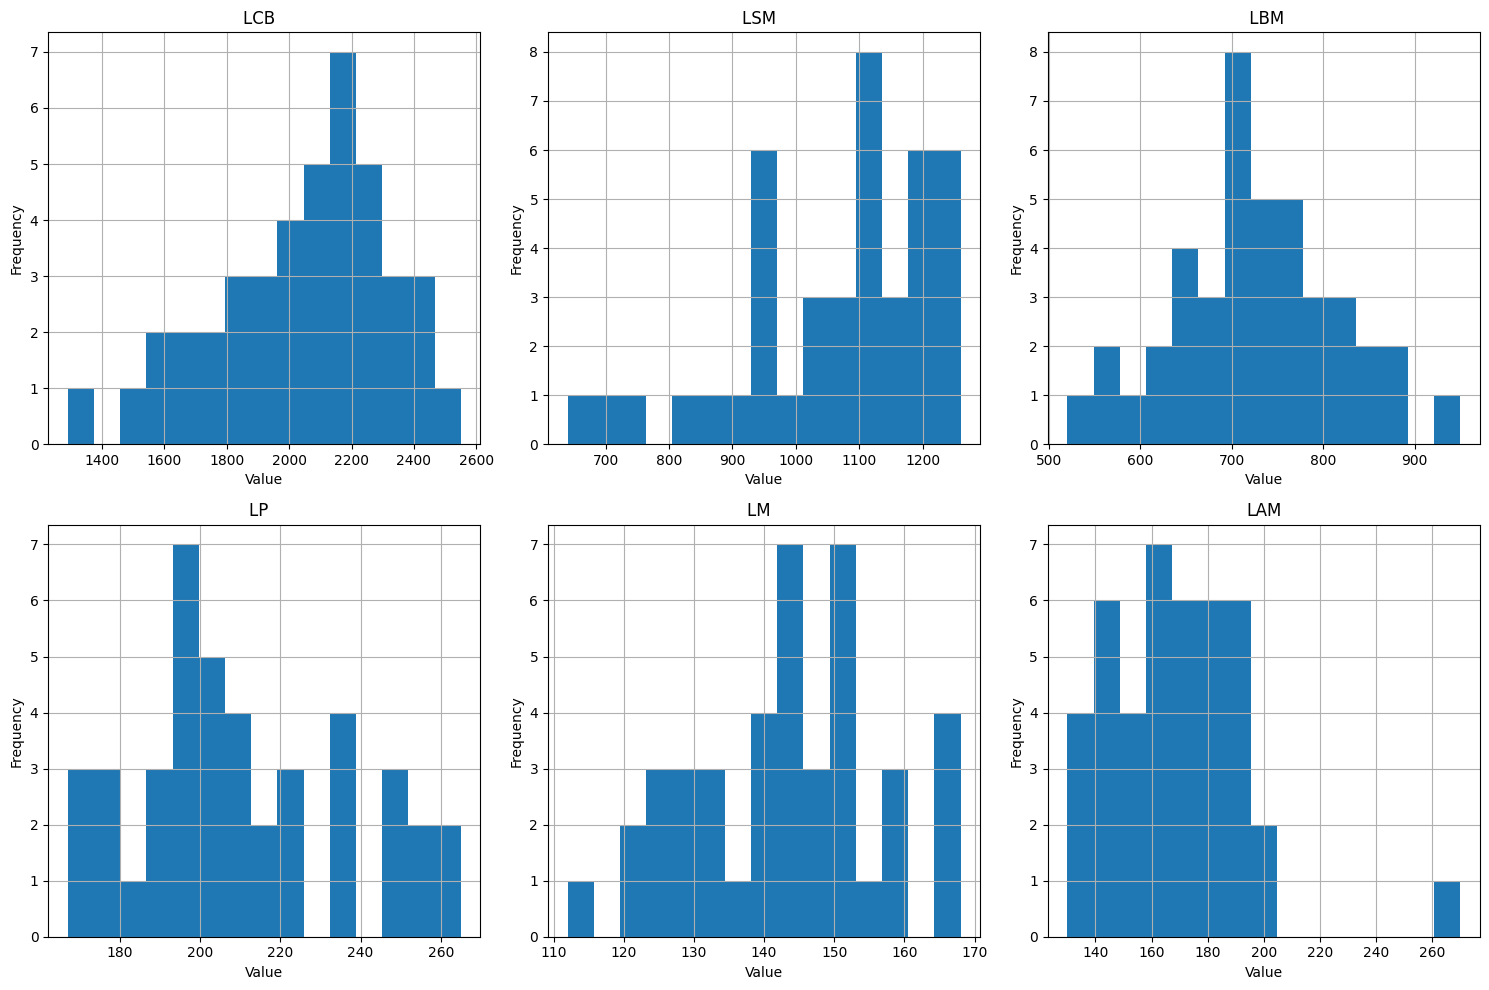

In [3]:
# Plotting histograms for each numerical column
plt.figure(figsize=(15, 10))

for i, column in enumerate(data.columns[1:-1], 1):
    plt.subplot(2, 3, i)
    data[column].hist(bins=15)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Division des données en sous-groupes basés sur la colonne 'GENRE'

In [4]:
groups = data.groupby('GENRE')

Calcul des matrices de variance-covariance pour chaque sous-groupe


In [5]:
numeric_columns = data.select_dtypes(include=[float, int]).columns
var_cov_matrices = {group: df[numeric_columns].cov() for group, df in groups}

L'analyse de la matrice de covariance globale (V) et des valeurs de discrimination (d) pour les variables de notre jeu de données révèle la capacité de certaines variables à différencier les groupes 'CHIEN' et 'LOUP'. La matrice de covariance indique une forte relation entre certaines variables, comme LCB et LSM, tandis que les valeurs de discrimination montrent que des variables telles que LP et LCB sont efficaces pour distinguer les groupes, avec LP étant particulièrement distincte. En revanche, des valeurs négatives pour LSM et LM suggèrent une faible utilité de ces variables pour la séparation des groupes. En conclusion, certaines variables initiales, notamment LP et LCB, séparent bien les groupes, tandis que d'autres sont moins efficaces pour cette tâche dans l'exemple donné.

Calcul des vecteurs moyens pour chaque sous-groupe


In [6]:
mean_vectors_complete = {group: df[numeric_columns].mean() for group, df in groups}
overall_mean = data[numeric_columns].mean()

Calcul de la matrice de dispersion interclasse B𝑝×𝑝

In [18]:
n = data.shape[0]
B = sum([(mean_vectors_complete[group] - overall_mean).values.reshape(-1, 1) @ 
                       (mean_vectors_complete[group] - overall_mean).values.reshape(1, -1) *
                       groups.get_group(group).shape[0] for group in groups.groups]) / n
print("Matrice de dispersion interclasse B𝑝×𝑝 :")
print(B)

Matrice de dispersion interclasse B𝑝×𝑝 :
[[4480.27777778 3225.3968254  1214.56349206 1448.90873016  630.46428571
  1046.23809524]
 [3225.3968254  2321.99546485  874.37641723 1043.08390023  453.87755102
   753.19727891]
 [1214.56349206  874.37641723  329.25736961  392.78628118  170.91326531
   283.62585034]
 [1448.90873016 1043.08390023  392.78628118  468.5728458   203.89030612
   338.35034014]
 [ 630.46428571  453.87755102  170.91326531  203.89030612   88.71887755
   147.22653061]
 [1046.23809524  753.19727891  283.62585034  338.35034014  147.22653061
   244.31836735]]


Calcul de la matrice de variance intraclasse W𝑝×𝑝

In [19]:
W = sum([groups.get_group(group).shape[0] * var_cov_matrices[group] for group in groups.groups]) / n
print("Matrice de variance intraclasse W𝑝×𝑝 :")
print(W)

Matrice de variance intraclasse W𝑝×𝑝 :
              LCB           LSM            LBM         LP           LM     
LCB    73209.187938  37665.367965  7823.787132  3037.510823  2107.636214  \
LSM    37665.367965  20987.871324  1971.547992  1593.836393  1077.060755   
 LBM    7823.787132   1971.547992  8294.633527   502.741454   271.084490   
LP      3037.510823   1593.836393   502.741454   214.480594   113.606434   
LM      2107.636214   1077.060755   271.084490   113.606434    97.521645   
LAM     3034.309598   1502.937006   528.725183   154.976414   120.159725   

               LAM  
LCB    3034.309598  
LSM    1502.937006  
 LBM    528.725183  
LP      154.976414  
LM      120.159725  
LAM     385.327288  


Calcul de la variance totale V

In [20]:
V = B + W
print("Variance totale V :")
print(V)

Variance totale V :
              LCB           LSM            LBM         LP           LM     
LCB    77689.465716  40890.764791  9038.350624  4486.419553  2738.100500  \
LSM    40890.764791  23309.866789  2845.924409  2636.920294  1530.938306   
 LBM    9038.350624   2845.924409  8623.890897   895.527735   441.997756   
LP      4486.419553   2636.920294   895.527735   683.053440   317.496740   
LM      2738.100500   1530.938306   441.997756   317.496740   186.240523   
LAM     4080.547694   2256.134284   812.351033   493.326755   267.386256   

               LAM  
LCB    4080.547694  
LSM    2256.134284  
 LBM    812.351033  
LP      493.326755  
LM      267.386256  
LAM     629.645655  


Calcul de la valeur de discrimination d pour chaque variable Xj avant projection

In [21]:
# Calcul de l'inverse de la matrice de variance totale V
V_inv = np.linalg.inv(V)

# Calcul de la valeur de discrimination d = V^-1 * B
d = V_inv @ B
print("Valeur de discrimination d pour chaque variable Xj avant projection :")
print(d)

Valeur de discrimination d pour chaque variable Xj avant projection :
[[-1.17000233e-01 -8.42296392e-02 -3.17177235e-02 -3.78375333e-02
  -1.64642623e-02 -2.73219892e-02]
 [ 6.49932516e-03  4.67892925e-03  1.76190930e-03  2.10186275e-03
   9.14584452e-04  1.51772768e-03]
 [-5.05164900e-02 -3.63673269e-02 -1.36945715e-02 -1.63368851e-02
  -7.10867592e-03 -1.17966517e-02]
 [ 2.45735517e+00  1.76907459e+00  6.66167150e-01  7.94701476e-01
   3.45798799e-01  5.73843570e-01]
 [ 5.44294479e-01  3.91843044e-01  1.47553396e-01  1.76023243e-01
   7.65930701e-02  1.27104088e-01]
 [ 3.05284383e-01  2.19777283e-01  8.27598833e-02  9.87280765e-02
   4.29595909e-02  7.12902563e-02]]


Matrice B (Variance Interclasse) :

Des valeurs élevées dans certaines cellules indiquent une différenciation significative entre les groupes pour ces variables spécifiques.

Matrice W (Variance Intraclasse) :

La matrice montre une variabilité considérable au sein des groupes pour chaque variable.

Matrice V (Variance Totale) :

Combinant les variances intra et interclasse, elle montre la variabilité totale pour chaque variable.

Matrice de discrimination d :

Des valeurs élevées positives dans d, notamment dans la quatrième ligne, suggèrent une forte contribution de cette variable à la distinction entre les groupes.
Les valeurs négatives ou plus petites indiquent une contribution moindre à la discrimination.

En conclusion, la quatrième variable ressort comme particulièrement discriminante entre les groupes.

In [22]:
eigenvalues, eigenvectors = np.linalg.eig(d)

eigenvalues, eigenvectors

(array([ 8.16568927e-01+0.00000000e+00j,  1.12918676e-16+4.23589264e-16j,
         1.12918676e-16-4.23589264e-16j, -1.64093198e-16+8.68471931e-17j,
        -1.64093198e-16-8.68471931e-17j, -2.23734131e-18+0.00000000e+00j]),
 array([[ 0.04608905+0.j        , -0.07254389-0.17004688j,
         -0.07254389+0.17004688j, -0.00622464+0.00080238j,
         -0.00622464-0.00080238j, -0.12180638+0.j        ],
        [-0.00256023+0.j        , -0.08035551+0.25270008j,
         -0.08035551-0.25270008j,  0.04353176-0.02132739j,
          0.04353176+0.02132739j,  0.16184409+0.j        ],
        [ 0.01989959+0.j        , -0.03326872+0.0349181j ,
         -0.03326872-0.0349181j ,  0.01668263-0.03259692j,
          0.01668263+0.03259692j,  0.46543082+0.j        ],
        [-0.96800802+0.j        ,  0.03962392-0.11080307j,
          0.03962392+0.11080307j, -0.42496434-0.0209902j ,
         -0.42496434+0.0209902j , -0.74131215+0.j        ],
        [-0.21440996+0.j        ,  0.93542337+0.j        ,
     

étude de la diagonalisibilité de V^-1*B: c'est une matrice 6*6 réelle non symétrique. les valeurs propres et les vectuers inpliquent des nombres complexes ce qui traduit bien que la matrice n'est pas diagonalisable dans R

In [28]:
#calculons C avec la formule de l'annexe

c_kj = {}

for group, mean_vector in mean_vectors_complete.items():
    group_size = groups.get_group(group).shape[0]
    c_kj[group] = np.sqrt(group_size/n) * (mean_vector - overall_mean)

c_matrix = np.array([c_kj[group].values for group in c_kj])

Ct_C_combined = c_matrix.T @ c_matrix

c_matrix

array([[-35.77819678, -25.75708205,  -9.69915121, -11.5705642 ,
         -5.03470463,  -8.35495349],
       [ 56.5702962 ,  40.72552258,  15.3357046 ,  18.29466835,
          7.96056699,  13.21034139]])

On a bien décomposé B comme prévu par le td. pour la suite on considere qu'il y a une petite coquille dans l'annexe car les dimensions ne marchent pas: on diagonalise la matrice 𝐂*V^-1*tC

In [29]:
# Calculating C*V^-1*tC matrix
C_V_inv_Ct = c_matrix @ V_inv @ c_matrix.T

# Diagonalization of the matrix C*V^-1*tC
eigenvalues_C_V_inv_Ct, eigenvectors_C_V_inv_Ct = np.linalg.eig(C_V_inv_Ct)

eigenvalues_C_V_inv_Ct, eigenvectors_C_V_inv_Ct



(array([-1.11022302e-16,  8.16568927e-01]),
 array([[-0.84515425,  0.53452248],
        [-0.53452248, -0.84515425]]))